In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
file_path = 'zomato_data .csv'
data = pd.read_csv(file_path)

In [27]:
print(data.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [28]:
print(data.dtypes)

# Clean the rating column and convert it to a float
data['rate'] = data['rate'].astype(str).str.replace('/5', '').astype(float)

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object


In [29]:
type_counts = data['listed_in(type)'].value_counts()

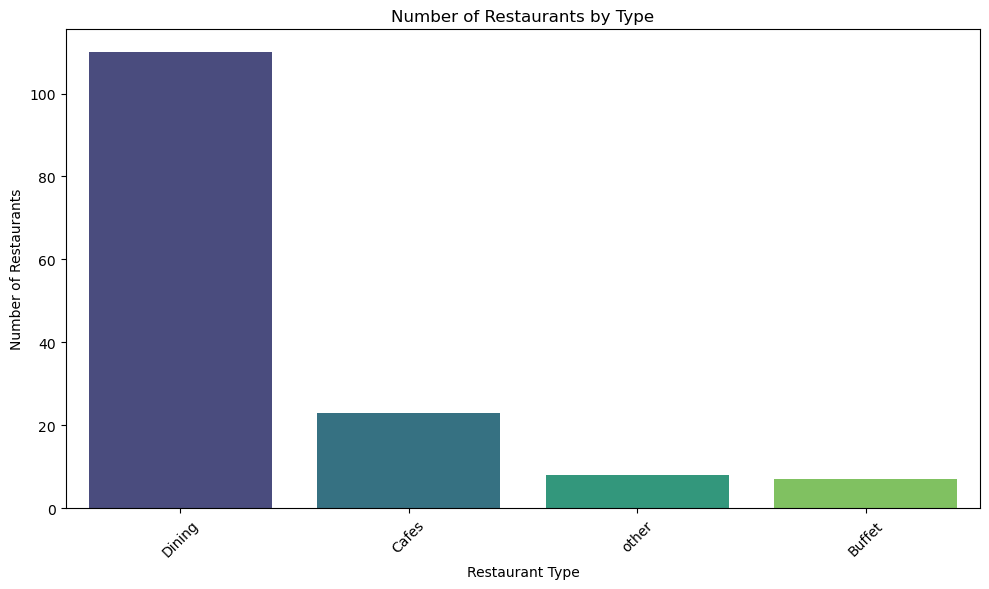

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Number of Restaurants by Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
# Average rating by restaurant type
average_rating = data.groupby('listed_in(type)')['rate'].mean().sort_values()

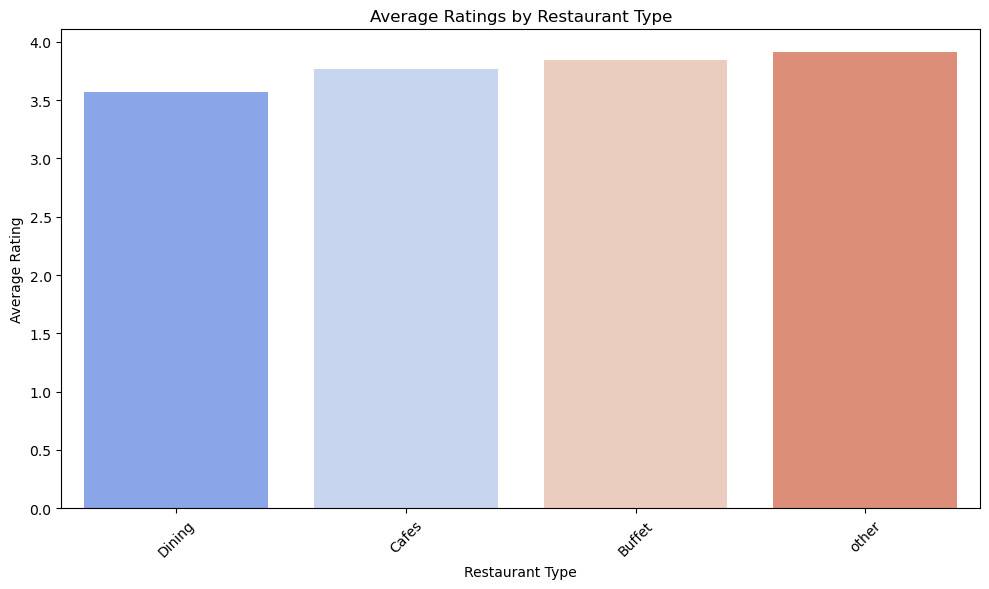

In [32]:
# Visualization: Bar plot of average ratings by type
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating.index, y=average_rating.values, palette='coolwarm')
plt.title('Average Ratings by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
# Filter restaurants with online ordering
online_order = data[data['online_order'] == 'Yes']

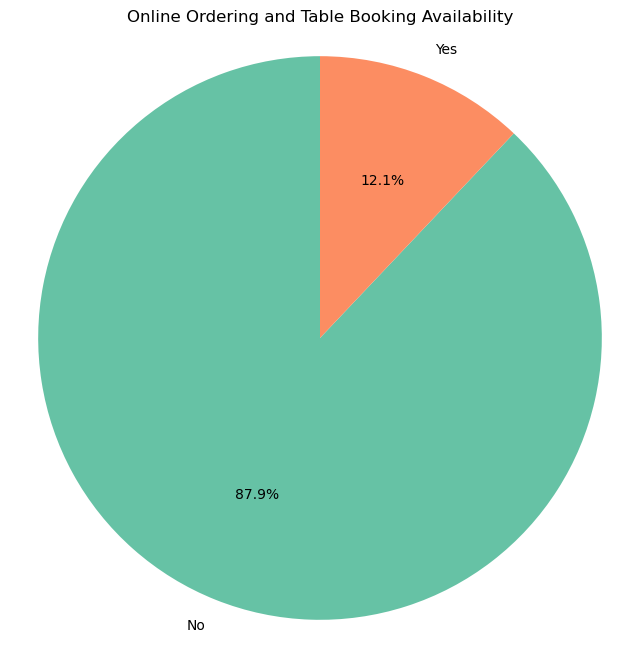

In [34]:
# Visualization: Pie chart for online ordering
plt.figure(figsize=(8, 8))
online_order_count = online_order['book_table'].value_counts()
plt.pie(online_order_count, labels=online_order_count.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Online Ordering and Table Booking Availability')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()